In [127]:
from pandas_datareader import data, wb ##Data reader to read data from web
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Data 
  
**Name (DataFrame Name)**  
<input type="checkbox"> Bank of America (BAC)  
<input type="checkbox"> CitiGroup (C)  
<input type="checkbox"> Goldman Sachs (GS)  
<input type="checkbox"> JPMorgan Chase (JPM)  
<input type="checkbox"> Morgan Stanley (MS)   
<input type="checkbox"> Wells Fargo (WFC)  


In [8]:
#Create time interval (2006 to 2019)
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2019,1,1)

In [13]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [14]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [24]:
## Concat all banks
banks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

In [33]:
banks.columns.names=['Banks', 'Stock Info']

In [34]:
banks.head()

Banks             BAC                                                          \
Stock Info       High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.717861   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.338535   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.384048   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.330940   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.353695   

Banks                C                                      ...         MS  \
Stock Info        High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

Banks                                              WFC                        \
Stock Info      Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.006454  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  38.032536  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  38.136818  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  38.175922  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  38.580029  31.825001  31.555000  31.674999   

Banks                                         
Stock Info      Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.045347  
2006-01-04  31.530001  10870000.0  20.801256  
2006-01-05  31.495001  10158000.0  20.778162  
2006-01-06  31.680000   8403800.0  20.900213  
2006-01-09  31.674999   5619600.0  20.896914  

[5 rows x 36 columns]

In [38]:
## Max stock close value per bank
banks.xs(key='Close',axis=1,level='Stock Info').max()

Banks
BAC     54.900002
C      564.099976
GS     273.380005
JPM    118.769997
MS      89.300003
WFC     65.930000
dtype: float64

Stock Return
  $$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$  
  Use pct_change() on close to represent return

In [69]:
returns = pd.DataFrame()

In [70]:
for tick in tickers:
    returns[tick+' Return'] = banks[tick]['Close'].pct_change()


In [68]:
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


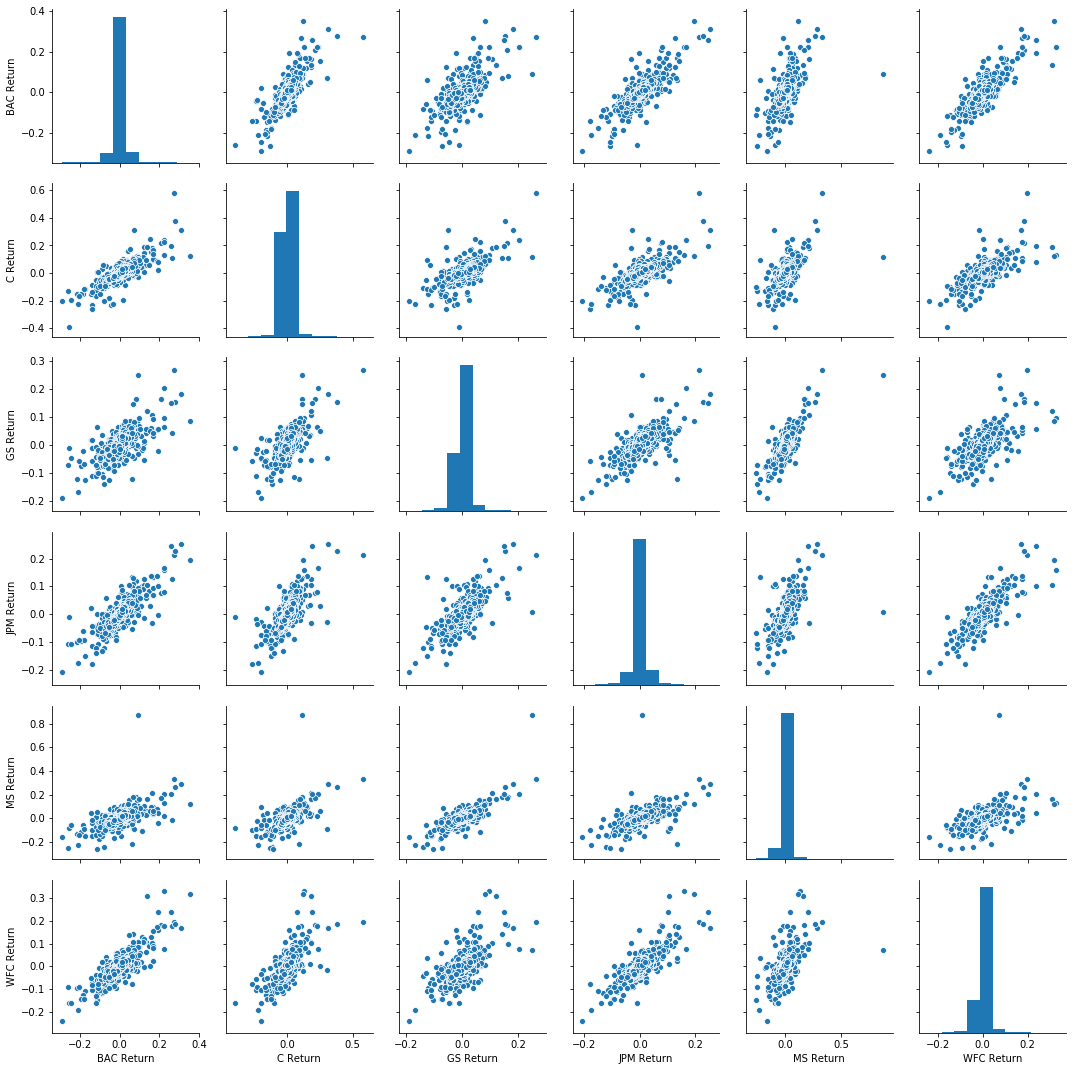

In [74]:
sns.pairplot(returns[1:]) ##NaN excluded

In [87]:
returns.min() ## Which day this happened?

BAC Return   -0.289694
C Return     -0.390244
GS Return    -0.189596
JPM Return   -0.207274
MS Return    -0.258929
WFC Return   -0.238223
dtype: float64

In [88]:
returns.max() ## Which day this happened?

BAC Return    0.352691
C Return      0.578249
GS Return     0.264678
JPM Return    0.250967
MS Return     0.869835
WFC Return    0.327645
dtype: float64

In [93]:
returns.idxmin() ## Worst

BAC Return   2009-01-20
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

**BAC, GS, JPM and WFC had the same worst day  
this day was Obama'inauguration**

In [91]:
returns.idxmax() ## Best

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WFC Return   2008-07-16
dtype: datetime64[ns]

In [94]:
returns.std() ## CitiGroup has the highest std, risky stocks?

BAC Return    0.033124
C Return      0.034762
GS Return     0.023455
JPM Return    0.025106
MS Return     0.034185
WFC Return    0.027336
dtype: float64

In [108]:
## Std on 2018
returns[(returns.index.date >= datetime.date(2018, 1, 1)) & (returns.index.date < datetime.date(2019, 1, 1))].std()

BAC Return    0.015616
C Return      0.015093
GS Return     0.016175
JPM Return    0.013879
MS Return     0.017187
WFC Return    0.014804
dtype: float64

In [118]:
citi_2018 = returns[(returns.index.date>=datetime.date(2018,1,1)) & (returns.index.date<datetime.date(2019,1,1))]['C Return']
print("CitiGroup Return STD 2018: ",citi_2018.std())

CitiGroup Return STD 2018:  0.015093086953373872


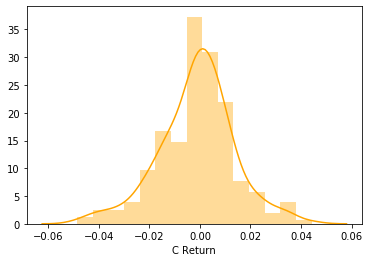

In [125]:
sns.distplot(citi_2018, color='orange', bins=15)

In [128]:
sns.set_style('whitegrid')

**Line Graph to close price over time**

In [135]:
banks.head()

Banks             BAC                                                          \
Stock Info       High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  35.717861   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  35.338535   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  35.384048   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  35.330940   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  35.353695   

Banks                C                                      ...         MS  \
Stock Info        High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  493.799988  481.100006  490.000000  492.899994  ...  57.169998   
2006-01-04  491.000000  483.500000  488.600006  483.799988  ...  58.700001   
2006-01-05  487.799988  484.000000  484.399994  486.200012  ...  58.549999   
2006-01-06  489.000000  482.000000  488.799988  486.200012  ...  58.770000   
2006-01-09  487.399994  483.000000  486.000000  483.899994  ...  58.630001   

Banks                                              WFC                        \
Stock Info      Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  38.006454  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  38.032536  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  38.136818  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  38.175922  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  38.580029  31.825001  31.555000  31.674999   

Banks                                         
Stock Info      Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  21.045347  
2006-01-04  31.530001  10870000.0  20.801256  
2006-01-05  31.495001  10158000.0  20.778162  
2006-01-06  31.680000   8403800.0  20.900213  
2006-01-09  31.674999   5619600.0  20.896914  

[5 rows x 36 columns]

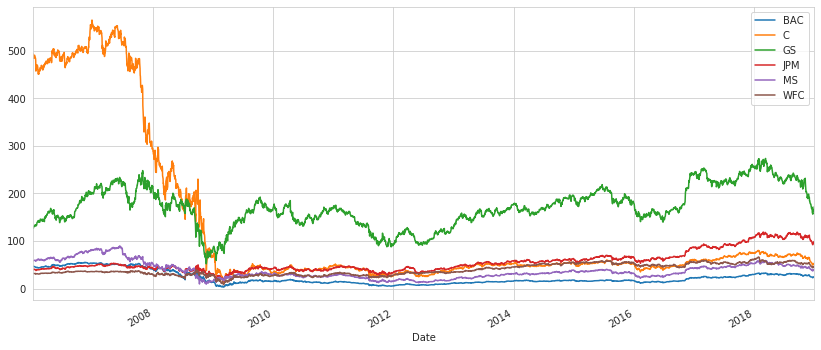

In [137]:
for tick in tickers: ##Walk over columns
    banks[tick]['Close'].plot(figsize=(14,6), label=tick)
plt.legend()

# Moving Average

In [149]:
## Moving Average BAC 2018
BAC.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,35.717861
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,35.338535
2006-01-05,46.830002,46.320000,46.580002,46.639999,14970700.0,35.384048
2006-01-06,46.910000,46.349998,46.799999,46.570000,12599800.0,35.330940
2006-01-09,46.970001,46.360001,46.720001,46.599998,15619400.0,35.353695


In [159]:
BAC_2018 = BAC['Close'][BAC.index.year==2018]
BAC_ma = BAC_2018.rolling(window=30).mean() ## Month rolling mean

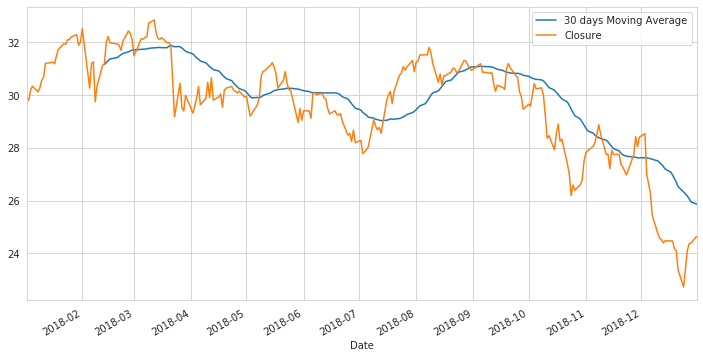

In [175]:
plt.figure(figsize=(12,6))
BAC_ma.plot(label='30 days Moving Average')
BAC_2018.plot(label='Closure')
plt.legend()